# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [196]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [197]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [198]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [199]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [200]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [201]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()
# The response is of type dictionary
type(btc_response)
# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=3, sort_keys=True))


{
   "data": {
      "1": {
         "circulating_supply": 18852912,
         "id": 1,
         "last_updated": 1635088392,
         "max_supply": 21000000,
         "name": "Bitcoin",
         "quotes": {
            "USD": {
               "market_cap": 1134410481470,
               "percent_change_1h": -0.802802057775922,
               "percent_change_24h": -2.04016145005634,
               "percent_change_7d": -1.57413892298265,
               "percentage_change_1h": -0.802802057775922,
               "percentage_change_24h": -2.04016145005634,
               "percentage_change_7d": -1.57413892298265,
               "price": 60203.0,
               "volume_24h": 27648108632
            }
         },
         "rank": 1,
         "symbol": "BTC",
         "total_supply": 18852912,
         "website_slug": "bitcoin"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3105,
      "timestamp": 1635088392
   }
}


In [202]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()
# The response is of type dictionary
type(eth_response)
# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=3, sort_keys=True))

{
   "data": {
      "1027": {
         "circulating_supply": 118058664,
         "id": 1027,
         "last_updated": 1635088394,
         "max_supply": 0,
         "name": "Ethereum",
         "quotes": {
            "USD": {
               "market_cap": 475367196884,
               "percent_change_1h": -0.768473815333731,
               "percent_change_24h": -0.542783672394963,
               "percent_change_7d": 4.54811632499752,
               "percentage_change_1h": -0.768473815333731,
               "percentage_change_24h": -0.542783672394963,
               "percentage_change_7d": 4.54811632499752,
               "price": 4029.81,
               "volume_24h": 16500170979
            }
         },
         "rank": 2,
         "symbol": "ETH",
         "total_supply": 118058664,
         "website_slug": "ethereum"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3105,
      "timestamp": 1635088394
   }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [203]:
# Navigate the BTC response object to access the current price of BTC

btc_price = btc_response['data']['1']['quotes']['USD']['price']
# Print the current price of BTC
print(f"the current price of btc is ${btc_price}")


the current price of btc is $60203.0


In [204]:
# Navigate the ETH response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"the current price of btc is ${eth_price}")


the current price of btc is $4029.81


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [205]:
# Compute the current value of the BTC holding 
current_btc_value = btc_price*btc_coins

# Print current value of your holding in BTC
print(f"the current value of BTC holding is ${current_btc_value:0.2f}")


the current value of BTC holding is $72243.60


In [206]:
# Compute the current value of the ETH holding 
current_eth_value = eth_price*eth_coins

# Print current value of your holding in ETH
print(f"the current value of ETH holding is ${current_eth_value:0.2f}")

the current value of ETH holding is $21357.99


In [207]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = current_btc_value + current_eth_value

# Print current cryptocurrency wallet balance
print(f"the total value of the cryptocurrency wallet is ${total_crypto_wallet:0.2f}")

the total value of the cryptocurrency wallet is $93601.59


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [208]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
AGG_shares = 200
SPY_shares = 110

print()

#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [209]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

alpaca


In [210]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [211]:
# Format current date as ISO format
#today = pd.Timestamp('2021-10-19', tz='America/New_York').isoformat()
start = pd.Timestamp("2021-10-18", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-10-18", tz="America/New_York").isoformat()


In [212]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Set both the start and end date at the date of your prior weekday
# This will give you the closing price of the previous trading day
start = pd.Timestamp("2021-10-18", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-10-18", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [213]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
).df

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head(5)


AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-10-18 00:00:00-04:00  114.33  114.56  114.25  114.49  5145953  443.97   

                                                             
                             high     low   close    volume  
time                                                         
2021-10-18 00:00:00-04:00  447.55  443.27  447.22  51994387

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [214]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
AGG_close_price_df = pd.DataFrame()

# Create an empty `closing_prices_df` DataFrame using Pandas
AGG_close_price_df = df_portfolio["AGG", "close"]

# Drop the time component of the date
AGG_close_price_df.index = AGG_close_price_df.index.date

#print(AGG_close_price_df)

AGG_close_price_df

2021-10-18    114.49
Name: (AGG, close), dtype: float64

In [215]:
# Access the closing price for SPY from the Alpaca DataFrame
SPY_close_price_df = pd.DataFrame()

# Converting the value to a floating point number
SPY_close_price_df = df_portfolio["SPY"]["close"]

# Print the SPY closing price

# Drop the time component of the date
SPY_close_price_df.index = SPY_close_price_df.index.date

# Print the SPY closing price
print(SPY_close_price_df)

2021-10-18    447.22
Name: close, dtype: float64


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [250]:
# Calculate the current value of the bond portion of the portfolio
AGG_value = (AGG_close_price_df*AGG_shares).iloc[0]

#Print the current value of the bond portfolio
print(AGG_value)

22898.0


In [251]:
# Calculate the current value of the stock portion of the portfolio
SPY_value =  (SPY_close_price_df * SPY_shares).iloc[0]

# Print the current value of the stock portfolio

print(SPY_value)

49194.200000000004


In [252]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = AGG_value + SPY_value

# Print the current balance of the stock and bond portion of the portfolio
print(total_stocks_bonds)

72092.20000000001


In [253]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print the total value of the member's entire savings portfolio
print(total_portfolio)

165693.793


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [254]:
# Consolidate financial assets data into a Python list
savings_data = [round(total_crypto_wallet,2), round(total_stocks_bonds,2)]

# Review the Python list savings_data
print(savings_data)

[93601.59, 72092.2]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

 - `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.
    
- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [255]:
# Create a Pandas DataFrame called savings_df 

savings_df = pd.DataFrame(savings_data, columns=["Amount"], index=['crypto', 'stock/bond'])

savings_df


,Amount
crypto,93601.59
stock/bond,72092.20


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

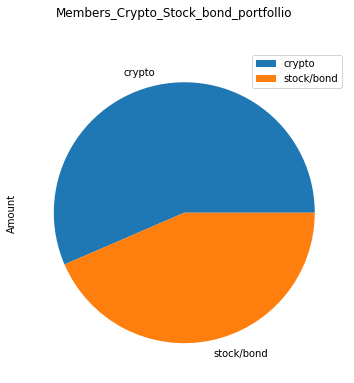

In [256]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart

plot = savings_df.plot.pie(subplots=True, figsize=(11, 6), title = 'Members_Crypto_Stock_bond_portfollio')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [257]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income*3
emergency_fund_value 

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [262]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

total_portfolio_1 = total_portfolio
emergency_fund_value_1 = emergency_fund_value

# For testing values
#total_portfolio_1 = 3000
#emergency_fund_value_1 = 3500

#If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.
if total_portfolio_1 > emergency_fund_value_1:
    print(f"Comgratulations, your total portfolio exceeds the emergency fund requirements, current value is ${total_portfolio_1}")
        
# the total portfolio value is equal to the emergency fund value.
elif total_portfolio_1 == emergency_fund_value_1:
    print("Comgratulations for reaching your savings goal")
        
else:
#If the total portfolio is less than the emergency fund value.
    print(f"Your portfolio is below the emergency fund value by ${emergency_fund_value_1 - total_portfolio_1}")
    

Comgratulations, your total portfolio exceeds the emergency fund requirements, current value is $165693.793


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [263]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start = pd.Timestamp("2018-10-22", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-10-21", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000


In [265]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
).df

# Display both the first and last five rows of the DataFrame
df_portfolio.head(5)


AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2021-06-02 00:00:00-04:00  114.45  114.51  114.30  114.485  5649317  420.37   
2021-06-03 00:00:00-04:00  114.31  114.46  114.21  114.210  3270096  417.87   
2021-06-04 00:00:00-04:00  114.39  114.67  114.22  114.665  4334878  420.75   
2021-06-07 00:00:00-04:00  113.97  114.64  113.97  114.595  3639918  422.59   
2021-06-08 00:00:00-04:00  114.84  114.87  114.78  114.820  3951702  423.11   

                                                               
                             high       low   close    volume  
time                                                           
2021-06-02 00:00:00-04:00  421.23  419.2900  420.38  41250387  
2021-06-03 00:00:00-04:00  419.99  416.2800  418.86  51582905  
2021-06-04 00:00:00-04:00  422.92  418.8422  422.57  45129316  
2021-06-07 00:00:00-04:00  422.78  421.1900  422.23  41442963  
2021-06-08 00:00:00-04:00  423.21  420.3200  422.27  40131441

In [266]:
# Display both the last five rows of the DataFrame

df_portfolio.tail(5)


AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-10-15 00:00:00-04:00  114.61  114.63  114.5100  114.56  3829388  444.76   
2021-10-18 00:00:00-04:00  114.33  114.56  114.2500  114.49  5145953  443.97   
2021-10-19 00:00:00-04:00  114.37  114.37  114.1600  114.18  3999066  448.92   
2021-10-20 00:00:00-04:00  114.17  114.29  114.0600  114.07  5881766  451.13   
2021-10-21 00:00:00-04:00  114.01  114.04  113.8423  113.85  4741154  451.76   

                                                              
                              high     low   close    volume  
time                                                          
2021-10-15 00:00:00-04:00  446.260  444.09  445.83  55980388  
2021-10-18 00:00:00-04:00  447.550  443.27  447.22  51994387  
2021-10-19 00:00:00-04:00  450.700  448.27  450.68  40790864  
2021-10-20 00:00:00-04:00  452.732  451.01  452.39  41594298  
2021-10-21 00:00:00-04:00  453.829  451.31  453.61  33945007

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [267]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
#portfolio_data = df_portfolio

MC_thirtyyear = MCSimulation(
  portfolio_data = df_portfolio,
  weights = [.40,.60],
  num_simulation = 500,
  num_trading_days = 252*30
)
# Review the simulation input data
MC_thirtyyear.portfolio_data.head()


AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2021-06-02 00:00:00-04:00  114.45  114.51  114.30  114.485  5649317   
2021-06-03 00:00:00-04:00  114.31  114.46  114.21  114.210  3270096   
2021-06-04 00:00:00-04:00  114.39  114.67  114.22  114.665  4334878   
2021-06-07 00:00:00-04:00  113.97  114.64  113.97  114.595  3639918   
2021-06-08 00:00:00-04:00  114.84  114.87  114.78  114.820  3951702   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2021-06-02 00:00:00-04:00          NaN  420.37  421.23  419.2900  420.38   
2021-06-03 00:00:00-04:00    -0.002402  417.87  419.99  416.2800  418.86   
2021-06-04 00:00:00-04:00     0.003984  420.75  422.92  418.8422  422.57   
2021-06-07 00:00:00-04:00    -0.000610  422.59  422.78  421.1900  422.23   
2021-06-08 00:00:00-04:00     0.001963  423.11  423.21  420.3200  422.27   

                                                  
                             volume daily_return  
time                                              
2021-06-02 00:00:00-04:00  41250387          NaN  
2021-06-03 00:00:00-04:00  51582905    -0.003616  
2021-06-04 00:00:00-04:00  45129316     0.008857  
2021-06-07 00:00:00-04:00  41442963    -0.000805  
2021-06-08 00:00:00-04:00  40131441     0.000095

In [268]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000323,0.992988,1.002663,0.998063,0.999430,1.000588,1.000749,1.003135,1.005827,0.995867,...,0.998677,0.996939,0.998083,0.999455,1.005063,0.999861,1.007727,0.998473,0.997638,0.991871
2,1.003140,0.994992,1.005689,1.003185,1.005033,1.002091,1.000333,1.007264,1.006139,0.993858,...,1.000866,0.999788,0.994554,1.001345,1.003095,0.996741,1.004896,0.999982,1.002358,0.994442
3,1.000422,0.989730,0.995627,1.002921,1.002797,1.003698,0.999776,1.006486,1.007794,0.994508,...,0.999344,0.993456,0.991821,0.997470,1.004858,1.006733,1.000271,1.004509,1.005418,0.992888
4,1.004977,0.989080,0.998039,1.003938,1.006172,0.998367,0.996178,1.004462,1.009673,1.003032,...,0.998119,0.998256,0.993881,0.997149,1.007033,0.996396,1.005546,0.999307,1.004753,0.992913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,44.602986,34.303488,33.040819,35.449101,51.990225,33.538220,20.794729,25.271753,45.326328,20.068090,...,29.997212,37.690214,20.207251,16.888292,17.881560,12.247947,28.161625,21.421212,22.298909,28.611624
7557,44.600523,34.189420,32.803790,35.460032,51.760160,33.634377,20.776965,24.990862,45.124834,20.144727,...,30.039997,38.022813,20.289472,16.910985,17.797249,12.249592,28.308518,21.487021,22.210031,28.599838
7558,44.819681,34.123784,32.747414,35.903185,52.038849,33.607292,20.777528,25.116635,45.064024,20.001179,...,30.198919,38.138115,20.253201,16.961871,17.846538,12.285836,28.452898,21.461144,22.282616,28.452882
7559,44.978605,33.938917,32.721302,35.700083,51.908725,33.491277,20.711532,25.258939,45.311942,19.880188,...,30.272009,38.286127,20.260067,16.914943,17.898462,12.329156,28.237067,21.566962,22.228844,28.350214


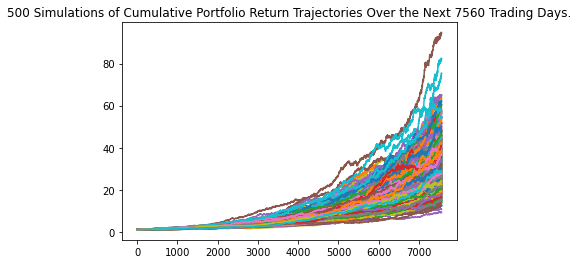

In [270]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future use
MC_sim_line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

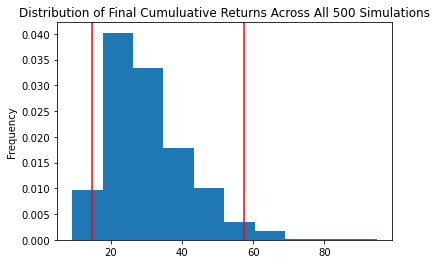

In [272]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future use
MC_sim_dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [273]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_30summary_statistics = MC_thirtyyear.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_30summary_statistics)

count           500.000000
mean             30.489703
std              11.486544
min               9.132774
25%              22.391191
50%              28.343965
75%              36.385919
max              94.638076
95% CI Lower     14.731363
95% CI Upper     57.501941
Name: 7560, dtype: float64


#### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?

**Answer** 95% CI lower = 14.731363 and 95% CI Upper is  57.501941, given a 95% convidence level , these are the lower and upper bounds of expected value of members portfolio.

In [274]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"the total value of the stock and bond portion of the portfolio is ${total_stocks_bonds:0.2f}")

the total value of the stock and bond portion of the portfolio is $72092.20


In [275]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_95_lower_cumulative_return = MC_30summary_statistics[8] * 72092.20
ci_95_upper_cumulative_return = MC_30summary_statistics[9] * 72092.20

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of $72002.20 in the current stock/bond portfolio"
  f" over the next 30 years will end within the range of"
  f" ${ci_95_lower_cumulative_return: .2f} and ${ci_95_upper_cumulative_return: .2f}.")


There is a 95% chance that an initial investment of $72002.20 in the current stock/bond portfolio over the next 30 years will end within the range of $ 1062016.36 and $ 4145441.41.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [276]:
# Configure the Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_tenyear = MCSimulation(
  portfolio_data = df_portfolio,
  weights = [.20,.80],
  num_simulation = 500,
  num_trading_days = 252*10
)
# Review the simulation input data
MC_tenyear.portfolio_data.head()


AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2021-06-02 00:00:00-04:00  114.45  114.51  114.30  114.485  5649317   
2021-06-03 00:00:00-04:00  114.31  114.46  114.21  114.210  3270096   
2021-06-04 00:00:00-04:00  114.39  114.67  114.22  114.665  4334878   
2021-06-07 00:00:00-04:00  113.97  114.64  113.97  114.595  3639918   
2021-06-08 00:00:00-04:00  114.84  114.87  114.78  114.820  3951702   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2021-06-02 00:00:00-04:00          NaN  420.37  421.23  419.2900  420.38   
2021-06-03 00:00:00-04:00    -0.002402  417.87  419.99  416.2800  418.86   
2021-06-04 00:00:00-04:00     0.003984  420.75  422.92  418.8422  422.57   
2021-06-07 00:00:00-04:00    -0.000610  422.59  422.78  421.1900  422.23   
2021-06-08 00:00:00-04:00     0.001963  423.11  423.21  420.3200  422.27   

                                                  
                             volume daily_return  
time                                              
2021-06-02 00:00:00-04:00  41250387          NaN  
2021-06-03 00:00:00-04:00  51582905    -0.003616  
2021-06-04 00:00:00-04:00  45129316     0.008857  
2021-06-07 00:00:00-04:00  41442963    -0.000805  
2021-06-08 00:00:00-04:00  40131441     0.000095

In [277]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006494,0.997408,1.004866,1.005560,1.003120,1.001891,0.998660,1.007888,1.002340,0.999751,...,0.996670,1.002252,1.003395,0.997853,1.002411,1.004433,0.997573,1.004924,1.001226,0.999962
2,1.004580,0.998002,1.010362,0.999375,1.000776,1.005210,0.998494,1.008590,1.000442,1.006019,...,0.988166,1.001188,0.999815,0.995092,1.001890,0.997645,0.997084,1.013996,1.000121,1.000569
3,1.011622,1.005741,1.003044,1.007656,1.016481,1.003381,0.992640,1.006243,0.997660,1.005646,...,0.995353,0.998352,0.996405,1.004163,0.989172,0.993927,0.990706,1.020644,1.007012,1.013507
4,1.012915,1.010166,1.008337,1.014356,1.015609,1.006646,0.989806,1.010692,0.998929,1.010654,...,0.996747,1.002661,0.996833,1.003233,0.986452,0.994350,0.997225,1.013547,1.005226,1.013284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.888448,3.762225,5.402292,4.385999,6.368835,4.189894,3.716337,4.392573,8.735840,7.495359,...,4.279877,4.350582,4.637083,4.371361,5.109312,5.818993,6.302548,4.197920,3.644618,3.655787
2517,2.883610,3.770913,5.398101,4.423226,6.338621,4.185071,3.737000,4.453669,8.745676,7.509366,...,4.231610,4.371390,4.656935,4.347540,5.120569,5.831443,6.329338,4.236281,3.642316,3.648859
2518,2.879680,3.781367,5.427534,4.435020,6.377893,4.169560,3.745352,4.442196,8.750404,7.517288,...,4.196254,4.366045,4.659654,4.361891,5.138189,5.782043,6.362171,4.241887,3.647431,3.654023
2519,2.888195,3.767711,5.438924,4.420503,6.370220,4.172392,3.735335,4.448798,8.770184,7.464972,...,4.201249,4.344217,4.652527,4.354423,5.151655,5.805463,6.373834,4.277664,3.662450,3.653327


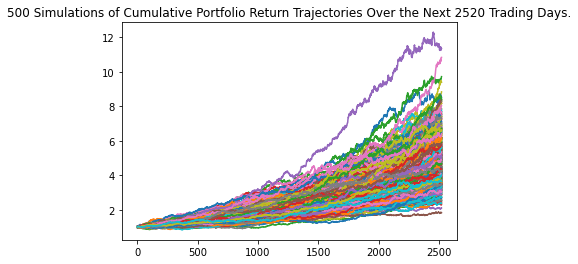

In [280]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_tenyear.plot_simulation()

# Save the plot for future use
MC_sim_line_plot.get_figure().savefig("MC_tenyear_sim_plot.png", bbox_inches="tight")

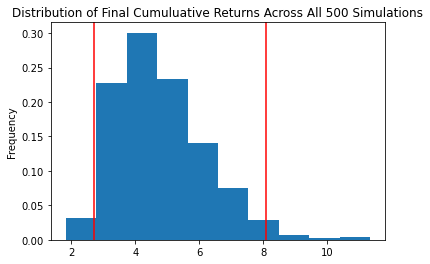

In [282]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_tenyear.plot_distribution()

# Save the plot for future use
MC_sim_dist_plot.get_figure().savefig('MC_tenyear_dist_plot.png',bbox_inches='tight')


In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10summary_statistics = MC_tenyear.summarize_cumulative_return()


In [283]:
# Review the 10-year Monte Carlo summary statistics
print(MC_10summary_statistics)

count           500.000000
mean              4.763328
std               1.495007
min               1.990647
25%               3.681602
50%               4.552488
75%               5.515247
max              15.202506
95% CI Lower      2.650423
95% CI Upper      8.163924
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

**Answer** 95% CI lower =  2.650423 and 95% CI Upper is 8.163924, given a 95% convidence level , these are the lower and upper bounds of expected value of members portfolio.

In [284]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"the total value of the stock and bond portion of the portfolio is ${total_stocks_bonds:0.2f}")


the total value of the stock and bond portion of the portfolio is $72092.20


In [286]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_95_lower_ten_cumulative_return = MC_10summary_statistics[8] * 72092.20
ci_95_upper_ten_cumulative_return = MC_10summary_statistics[9] * 72092.20

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of $72002.20 in the current stock/bond portfolio"
  f" over the next 10 years will end within the range of"
  f" ${ci_95_lower_ten_cumulative_return: .2f} and ${ci_95_upper_ten_cumulative_return: .2f}.")

There is a 95% chance that an initial investment of $72002.20 in the current stock/bond portfolio over the next 10 years will end within the range of $ 191074.79 and $ 588555.23.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?